In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# specific population is the students who meet the following criteria:
    # - are/were undergraduates
    # - the "term indicator" = Fall
    # - classified as FR (Freshmen)
    # - their cohort was 201409F, 201509F, 201609F, 201709F or 201809F
    # - were/are degree-seeking
# This population excludes any students whose initial term was not in the Fall (transfers) 

df = pd.read_excel('data/Census.xlsx', sheet_name='2014-2018')
df.head()

,SID,ID,FIRST_NAME,LAST_NAME,Academic Term,Initial Term,Term Indicator,Cohort,Ethnicity,Students of Color Indicator,...,SAT Math (old),SAT Verbal (old),SAT Writing (old),SAT Comp (old),Admission Rating,IR Score,High School GPA,HS Zip,HS Type,First_Gen
0,10416,10416,Caleb,Blagys,2015-16,201509,Fall,201509F,White,Non-Students of Color,...,580.0,550.0,560.0,1130.0,7,0.521500,2.79,06430,Private,0
1,10417,10417,Dylan,Freeman,2015-16,201509,Fall,201509F,White,Non-Students of Color,...,NaN,NaN,NaN,NaN,7,0.456947,2.23,06430,Private,0
2,21783,21783,Brandon,Russo,2014-15,201409,Fall,201409F,White,Non-Students of Color,...,600.0,420.0,450.0,1020.0,6,0.620750,3.42,06497,NaN,0
3,57992,57992,Annie,Huber,2015-16,201509,Fall,201509F,White,Non-Students of Color,...,520.0,580.0,580.0,1100.0,4,0.725000,3.35,06824,Public,1
4,61271,61271,Hunter,Campbell,2016-17,201609,Fall,201609F,Hispanic of any Race,Students of Color,...,NaN,NaN,NaN,NaN,4,0.739118,3.40,06824,Public,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 50 columns):
SID                                           4927 non-null int64
ID                                            4927 non-null int64
FIRST_NAME                                    4927 non-null object
LAST_NAME                                     4927 non-null object
Academic Term                                 4927 non-null object
Initial Term                                  4927 non-null int64
Term Indicator                                4927 non-null object
Cohort                                        4927 non-null object
Ethnicity                                     4927 non-null object
Students of Color Indicator                   4927 non-null object
SEX                                           4927 non-null object
CITY                                          4927 non-null object
STATE                                         4898 non-null object
ZIP                      

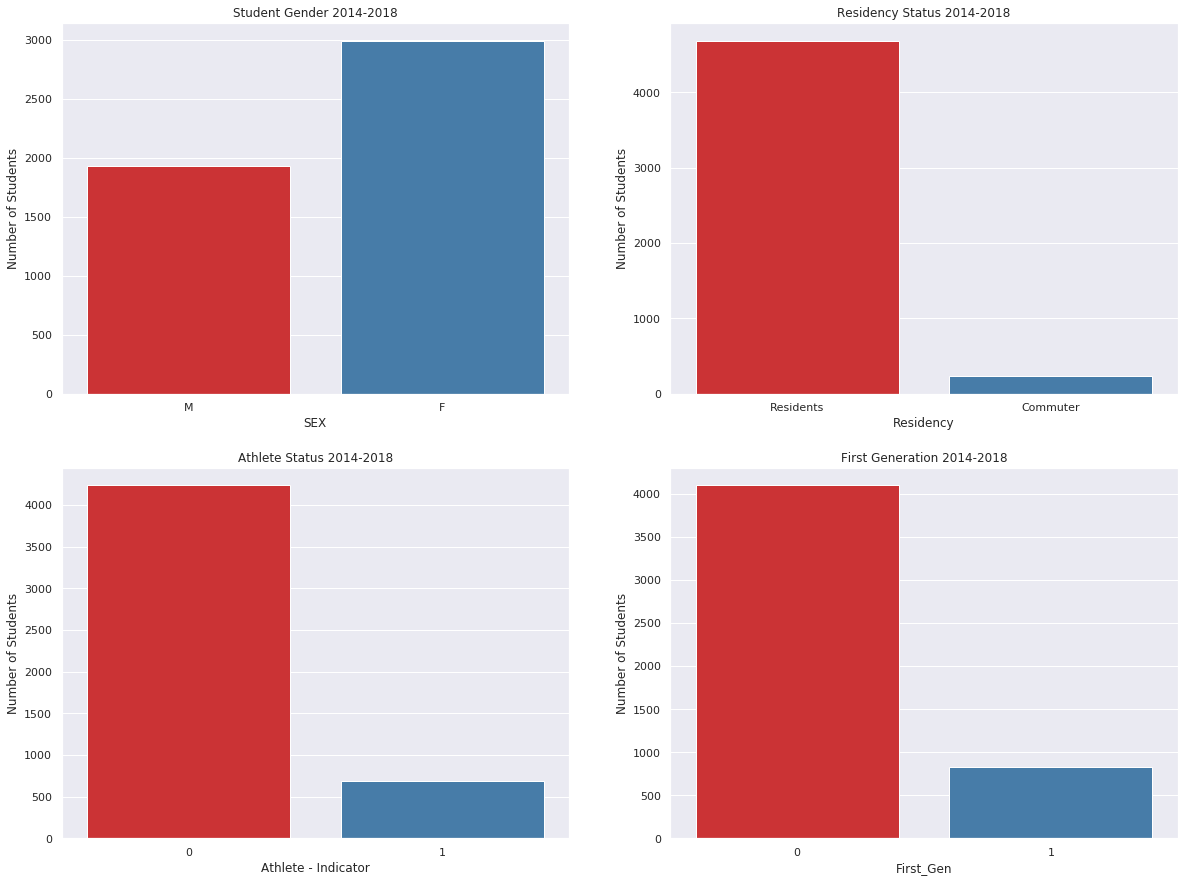

In [4]:
# graphs for demographic features 
fig = plt.figure(figsize=(20,15))
plt.tight_layout()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1 = sns.countplot(x=df['SEX'], data=df, palette='Set1', ax=ax1)
ax2 = sns.countplot(x=df['Residency'], data=df, palette='Set1', ax=ax2)
ax3 = sns.countplot(x=df['Athlete - Indicator'], data=df, palette='Set1', ax=ax3)
ax4 = sns.countplot(x=df['First_Gen'], data=df, palette='Set1', ax=ax4)

ax1.set_title('Student Gender 2014-2018')
ax2.set_title('Residency Status 2014-2018')
ax3.set_title('Athlete Status 2014-2018')
ax4.set_title('First Generation 2014-2018')

ax1.set_ylabel('Number of Students')
ax2.set_ylabel('Number of Students')
ax3.set_ylabel('Number of Students')
ax4.set_ylabel('Number of Students')

plt.savefig('images/gender_res_athlete_firstgen.PNG')

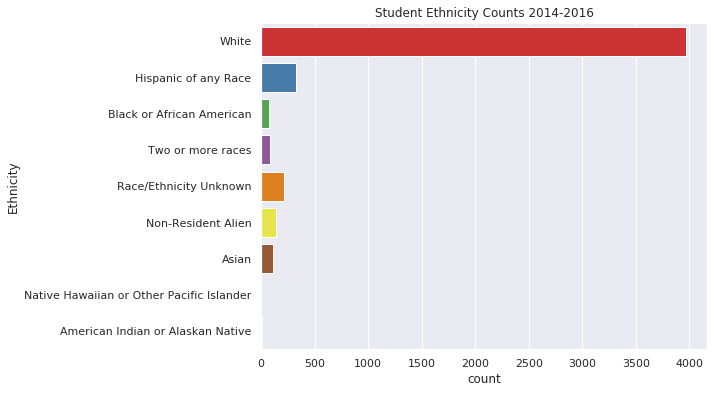

In [5]:
# 2014-2018 ethnicity graph
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(y="Ethnicity", data=df, hue_order='Ethnicity', palette='Set1')
plt.title('Student Ethnicity Counts 2014-2016')
plt.savefig('images/ethnicity.PNG')

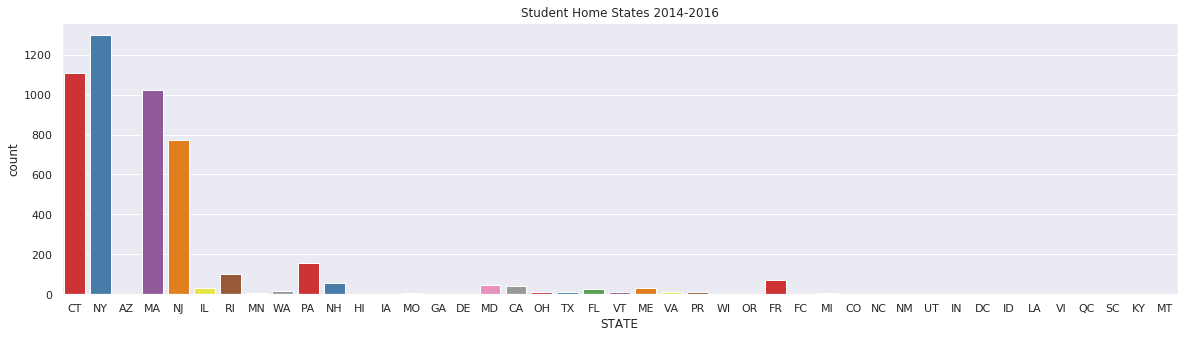

In [6]:
# 2014-2018 states graph
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x="STATE", data=df, hue_order='STATE', palette='Set1')
plt.title('Student Home States 2014-2016')
plt.savefig('images/states.PNG')

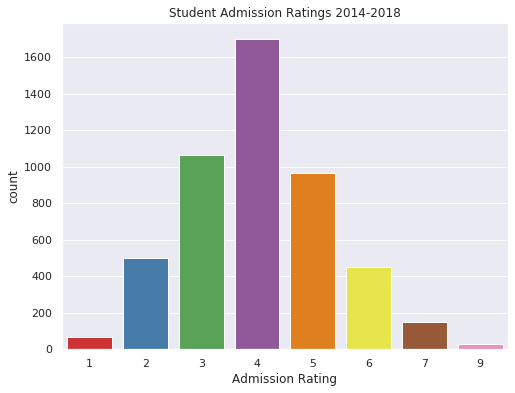

In [7]:
# 2014-2018 admission rating graph
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Admission Rating", data=df, hue_order='Admission Rating', palette='Set1')
plt.title('Student Admission Ratings 2014-2018')
plt.savefig('images/admit_rating.PNG')

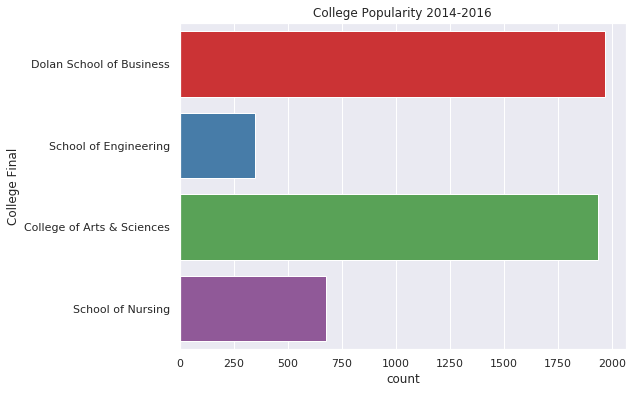

In [8]:
# 2014-2018 colleges graph
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(y="College Final", data=df, hue_order='College Final', palette='Set1')
plt.title('College Popularity 2014-2016')
plt.savefig('images/colleges.PNG')

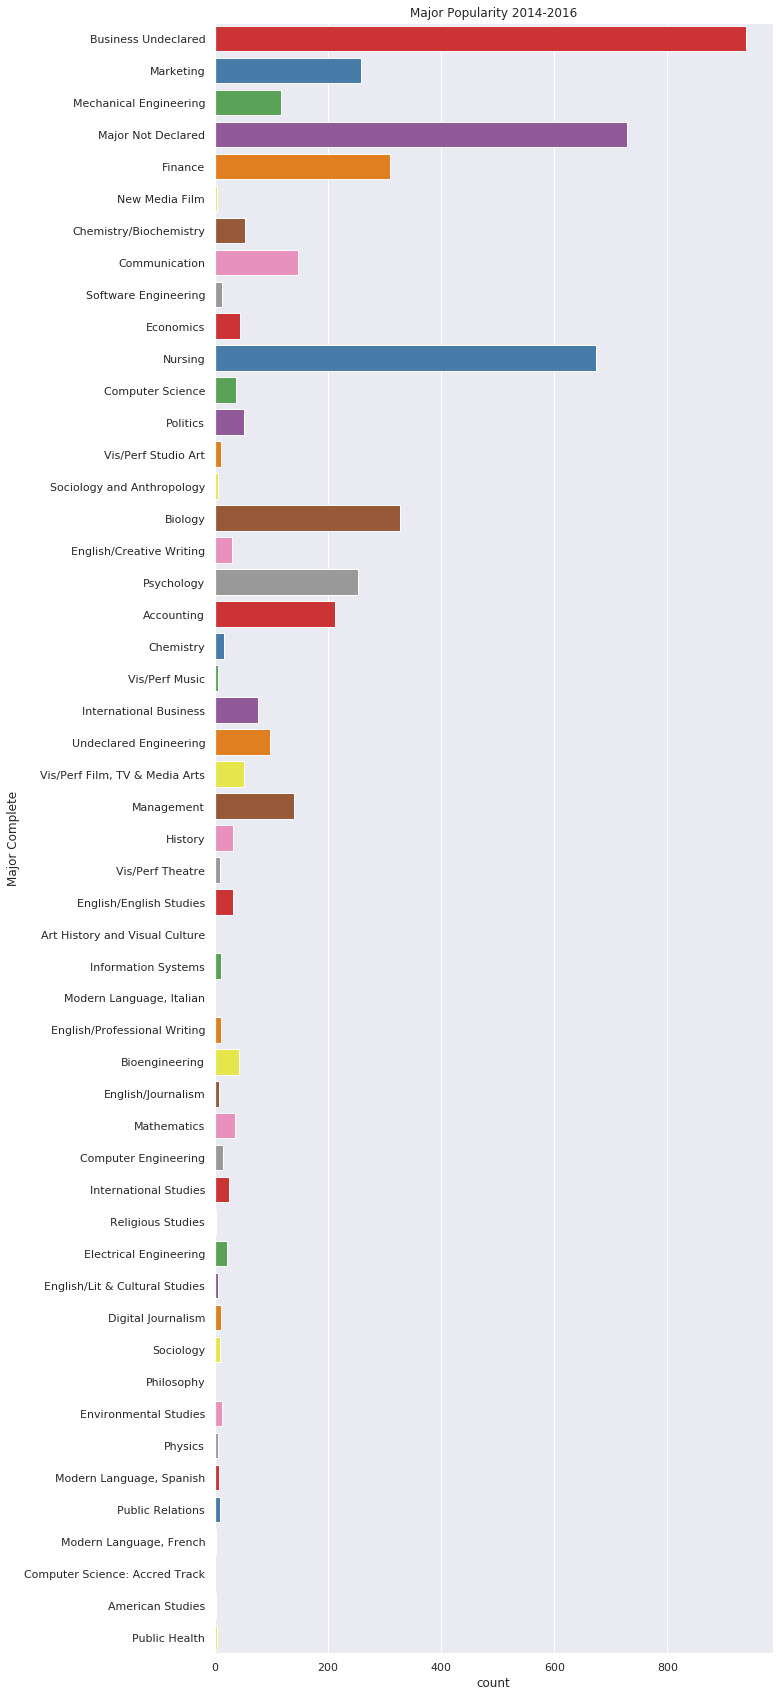

In [9]:
# 2014-2018 major popularity graph
fig = plt.figure(figsize=(10,30))
ax = sns.countplot(y="Major Complete", data=df, hue_order='Major Complete', palette='Set1')
plt.title('Major Popularity 2014-2016')
plt.savefig('images/majors.PNG')

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


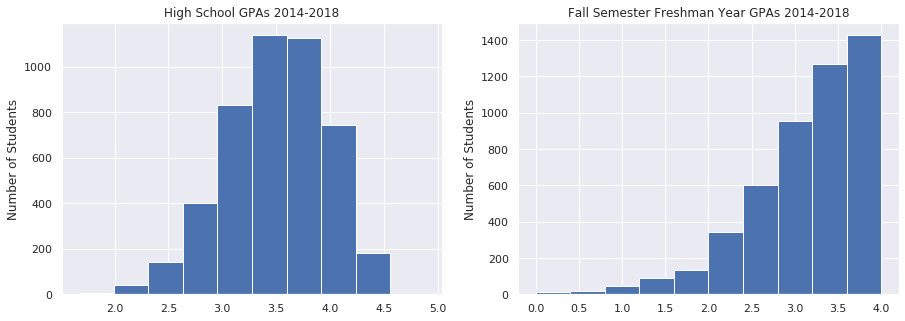

In [10]:
# HS GPA and Fall Semester Freshman Year GPA 
fig = plt.figure(figsize=(15,5))
plt.tight_layout()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(df['High School GPA'])
ax2.hist(df['GPA (end of 1st semester FR year)'])

ax1.set_title('High School GPAs 2014-2018')
ax2.set_title('Fall Semester Freshman Year GPAs 2014-2018')

ax1.set_ylabel('Number of Students')
ax2.set_ylabel('Number of Students')

plt.savefig('images/gpa.PNG')

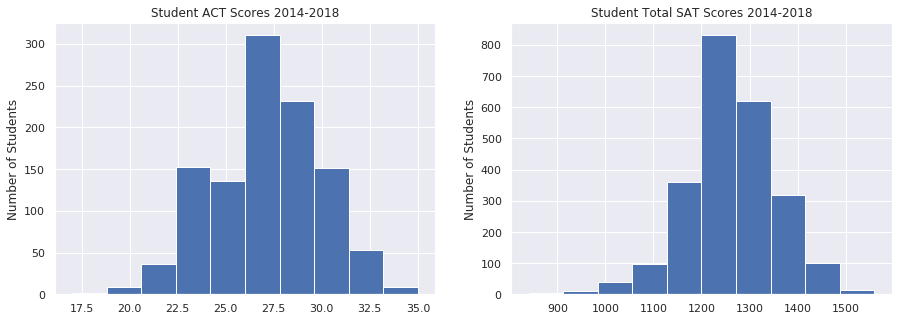

In [11]:
# ACT and SAT Scores
fig = plt.figure(figsize=(15,5))
plt.tight_layout()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(df['ACT'])
ax2.hist(df['SAT Comp (new)'])

ax1.set_title('Student ACT Scores 2014-2018')
ax2.set_title('Student Total SAT Scores 2014-2018')

ax1.set_ylabel('Number of Students')
ax2.set_ylabel('Number of Students')

plt.savefig('images/standard_tests.PNG')

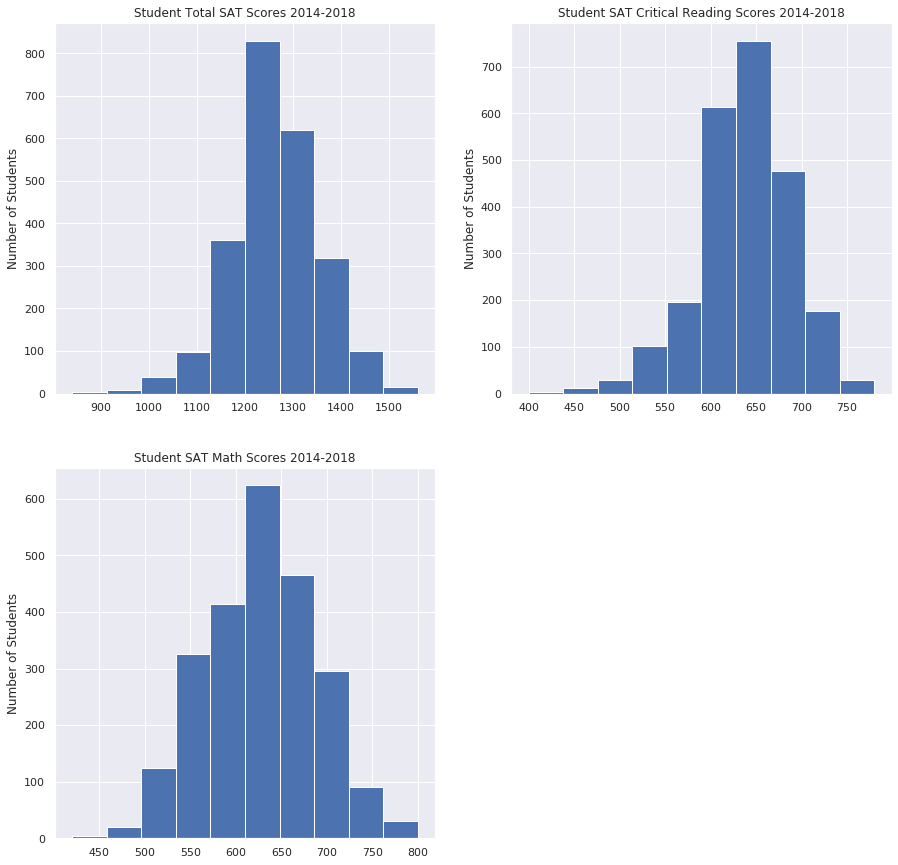

In [12]:
# SAT Score Breakdown
fig = plt.figure(figsize=(15,15))
plt.tight_layout()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(df['SAT Comp (new)'])
ax2.hist(df['SAT Critical Reading (new)'])
ax3.hist(df['SAT Math (new)'])

ax1.set_title('Student Total SAT Scores 2014-2018')
ax2.set_title('Student SAT Critical Reading Scores 2014-2018')
ax3.set_title('Student SAT Math Scores 2014-2018')

ax1.set_ylabel('Number of Students')
ax2.set_ylabel('Number of Students')
ax3.set_ylabel('Number of Students')

plt.savefig('images/sat_breakdown.PNG')